# Chapter 5: Revenue Maximization - The Art of the Reserve Price

Until now, we have been "benevolent" designers. We wanted the item to go to the highest bidder ($v_i$) to maximize societal happiness.

But what if you are a seller (like Google or a government selling spectrum)? You care about **Revenue**.

## The Conflict: Welfare vs. Revenue
Imagine a single bidder, Alice, with a valuation $v \sim U[0, 100]$ (Uniformly distributed).
* **Welfare Maximizer:** We just give it to her (price \$0). She is happy ($v$), we get \$0. Total Welfare = $v$.
* **Revenue Maximizer:** We set a price tag (Take-it-or-leave-it).
    * If we set price \$10: She buys often, but we make little.
    * If we set price \$90: We make a lot per sale, but she rarely buys.

This is the classic **Monopoly Pricing Problem**.

## The Solution: Myerson's Optimal Auction
Roger Myerson (yes, him again) proved that to maximize revenue, we shouldn't look at the bids directly. We should look at the **Virtual Valuations** ($\phi$).

The "Virtual Valuation" is a formula that adjusts a bid based on the probability distribution of the bidder's value.
$$\phi(v_i) = v_i - \frac{1 - F(v_i)}{f(v_i)}$$
* $v_i$: The bid.
* $F(v_i)$: The probability someone has a value *less* than this (CDF).
* $f(v_i)$: The probability density (PDF).

**The Optimal Auction Rule:**
1.  Calculate $\phi(v_i)$ for everyone.
2.  Winner is the person with the highest **Virtual Valuation** (provided $\phi > 0$).
3.  The point where $\phi(v) = 0$ acts as the **Optimal Reserve Price**.

Let's simulate this for a Uniform Distribution (where the math is easy).

--- Revenue Comparison (2 Bidders, U[0,100]) ---
Average Revenue (Standard 2nd Price): $33.52
Average Revenue (Optimal /w Reserve): $41.64
Revenue Increase: +24.2%


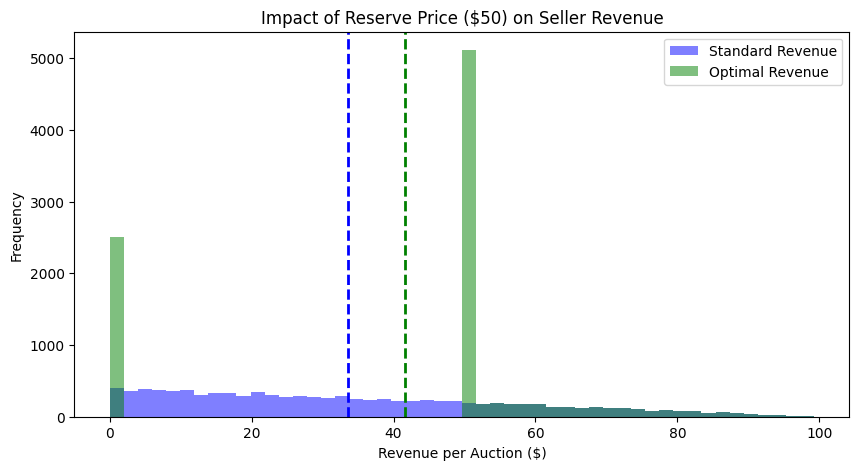

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def run_revenue_simulation(num_auctions=10000):
    """
    Compares Standard Second-Price Auction vs. Optimal Auction (with Reserve)
    Scenario: 2 Bidders, Valuations drawn from Uniform [0, 100]
    """
    
    # 1. Setup
    # Uniform Distribution U[0, 100]
    # For U[0,100], the Virtual Valuation is phi(v) = 2v - 100.
    # We want phi(v) >= 0, so 2v >= 100 --> v >= 50.
    # Therefore, the Optimal Reserve Price is $50.
    RESERVE_PRICE = 50 
    
    revenue_standard = []
    revenue_optimal = []
    
    for _ in range(num_auctions):
        # Generate random values for Bidder A and Bidder B
        bids = np.random.uniform(0, 100, 2)
        bids.sort() # Sort so bids[0] is low, bids[1] is high
        
        low_bid = bids[0]
        high_bid = bids[1]
        
        # --- MECHANISM A: STANDARD VICKREY (Second Price) ---
        # Highest bidder wins, pays second highest price.
        # Reserve is effectively $0.
        revenue_standard.append(low_bid)
        
        # --- MECHANISM B: MYERSON OPTIMAL (Reserve Price $50) ---
        # Rule: Both must bid at least $50.
        
        # Case 1: Both fail reserve (Both < 50) -> No Sale
        if high_bid < RESERVE_PRICE:
            revenue_optimal.append(0)
            
        # Case 2: Only one clears reserve (High > 50, Low < 50) -> Pay Reserve
        elif high_bid >= RESERVE_PRICE and low_bid < RESERVE_PRICE:
            revenue_optimal.append(RESERVE_PRICE)
            
        # Case 3: Both clear reserve -> Pay Second Highest (Standard)
        else: # Both >= 50
            revenue_optimal.append(low_bid)
            
    return revenue_standard, revenue_optimal

# Run Simulation
rev_std, rev_opt = run_revenue_simulation()

# --- ANALYSIS ---
avg_std = np.mean(rev_std)
avg_opt = np.mean(rev_opt)
lift = ((avg_opt - avg_std) / avg_std) * 100

print(f"--- Revenue Comparison (2 Bidders, U[0,100]) ---")
print(f"Average Revenue (Standard 2nd Price): ${avg_std:.2f}")
print(f"Average Revenue (Optimal /w Reserve): ${avg_opt:.2f}")
print(f"Revenue Increase: +{lift:.1f}%")

# --- VISUALIZATION ---
plt.figure(figsize=(10,5))
plt.hist(rev_std, bins=50, alpha=0.5, label='Standard Revenue', color='blue')
plt.hist(rev_opt, bins=50, alpha=0.5, label='Optimal Revenue', color='green')
plt.axvline(avg_std, color='blue', linestyle='dashed', linewidth=2)
plt.axvline(avg_opt, color='green', linestyle='dashed', linewidth=2)
plt.title(f"Impact of Reserve Price ($50) on Seller Revenue")
plt.xlabel("Revenue per Auction ($)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### What just happened?
You should see that the **Optimal Auction** generated significantly more revenue (usually around 10-15% more in this specific setting).

**How did it do that?**
Look at the histogram or the logic in the code:
1.  **The "Standard" Auction** often sells for very low prices (e.g., if bids are \$5 and \$2, revenue is \$2).
2.  **The "Optimal" Auction** refuses to sell for less than \$50.
    * If the high bidder was \$80 and the low bidder was \$2, the price jumps from \$2 to \$50 (the reserve).
    * **Trade-off:** Sometimes nobody buys (if both are < \$50), so we get \$0.
    
**Conclusion:**
By risking a "no-sale," the seller forces high-value bidders to pay a premium. This demonstrates that **Market Efficiency (Social Welfare)** and **Profit (Revenue)** are often at odds. To make the most money, you sometimes have to refuse to sell to people who want the item!